# 什么是统计学？

关于统计学的定义各种百科都有大同小异的解释，总结起来有以下几个共同点：
- 和数学有关。有说统计学是数学分支的，也有说统计学是与数学有交叉的独立学科，反正和数学有关是没跑的。
- 提供了一些概率模型。统计学用这些模型以量化的方式对现实世界提供了一种统一的解释口径，包括描述和推断。
- 辅助决策的。统计学因为能够为决策提供依据和参考而产生价值。
- 分为应用统计学和数理统计学两部分，前者用来研究统计学能干嘛，后者用来研究统计学背后的理论基础。

统计学是数据分析的基础，站在数据分析角度理解统计学更具有实践指导意义，这也是本人学习统计学的原因，即打好数据分析能力的根基。  
在实际业务中，数据分析是以量化的方式对业务问题进行分析并得出结论。而实现量化方式的手段就是依托于统计学工具。我们通过量化达到统一认识，而非不同的利益团队站在各自立场上争论无休，并建立起一整套可回溯、可复制以及可预测的数据管理体系，实现所有老板最钟爱的降本增效的目标。
我们再次通过以下数据分析的定义来感知下统计学的价值所在：
>数据分析就是把从历史数据中获得的洞察转化为可执行的决策或推荐的过程，其将计算机技术、管理科学和统计学结合以解决实际问题。

# 描述性统计

上面提到统计学有两大分支，即应用统计学和数理统计学。数据分析是应用统计学的一个重要应用领域，也是我们关注的重点。后面讲到的统计学都是指应用统计学。  
应用统计学又可划分为描述统计学和推论统计学两部分。从字面意思也容易理解，前者用来描述已经发生和存在的事实，后者用来预测未来可能发生的事情。  
那么描述统计学具体是如何描述业已存在的事实的呢？通常我们将这些业已存在的事实抽象为数据后，再对这些数据进行整理和分类形成结构化的数据。数据分析的对象主要是结构化数据，而所有的结构化数据都可以从三个维度进行描述，即数据的集中趋势描述、数据的离散程度描述和数据的分布形态描述。

# 数据的集中趋势描述

这块内容大概是统计学中我们最熟悉的部分，即便不懂统计学的人，在日常生活中也会经常接触到这些对数据集中趋势进行描述的统计学概念，比如平均数、众数、中位数等等。

## 众数

众数就是数据集中出现次数最多的数值。如果在一个数据集中，只有一个数值出现次数最多，那么这个数就是这个数据集的众数；有两个或者多个数值出现次数并列最多，那么这两个或者多个数值就是这个数据集的众数；如果所有数值出现次数一样多，那么我们就说这个数据集没有众数。

众数的应用场景是非常广泛的，比如我们常说的“爆款”；在淘宝、京东上买东西总是搜索需求物品后习惯按销量排序从卖得最多的几家中选取一家下单；买房子经常会参考网上资料说为什么某个户型卖得最好，最具性价比，等等。

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# 随机生成10个1-10间数字组成的数据集
nums = np.random.randint(1,11, size=10)
nums

array([2, 5, 7, 8, 2, 9, 8, 9, 7, 2])

In [3]:
# 求出数据集nums的众数
# 方法一:首先用numpy提供的方法bincount统计出数据集中每个元素出现的次数,再用argmax得出众数
counts = np.bincount(nums)
np.argmax(counts)

2

In [4]:
# 方法二:利用scipy下stats模块可直接求出众数
stats.mode(nums)[0][0]

2

## 中位数

对数据集进行排序,从大到小或从小到大都可以,如果数据集包含的数值个数是奇数,那么排在最中间的那个数就是这个数据集的中位数;如果数据集包含的数值个数是偶数,那么取最中间两个数的算数平均值作为该数据集的中位数.

中位数的优势是不受数据集中个别极端值的影响,表现出稳定的特点,因此常被用来度量具有偏斜性质的数据集的集中趋势,这样就可以避免极端值对描述数据集集中趋势的影响.现实生活中每逢公布哪个城市的平均工资,网络上便是一片抱怨"拖后腿"的感叹,假如我们将统计工资的平均换成统计工资的中位数将能更贴近人们的实际工资水平.显而易见,平均工资受工资当中个别极端值影响产生了偏斜,因此不能如实反映或者接近于"真相".

In [5]:
# 求出数据集nums的中位数
np.median(nums)

7.0

## 分位数

分位数是指用分割点（cut point）将一个随机变量的概率分布范围分为几个具有相同概率的连续区间。分割点的数量比划分出的区间少1，例如3个分割点能分出4个区间。常用的有中位数（即二分位数）、四分位数（quartile）、十分位数（decile ）、百分位数等,其中又以四分位数最为常见.

从上面分位数概念可以得出,四分位数就是把数据集从小到大排序后用是三个分割点分成四等份,而三个分割点所在位置就是四分位数.
- 第一四分位数 (Q1)，又称“下四分位数”，等于该样本中所有数据由小到大排列后第25%的数据。
- 第二四分位数 (Q2)，又称“中位数”，等于该样本中所有数据由小到大排列后第50%数据。
- 第三四分位数 (Q3)，又称“上四分位数”，等于该样本中所有数据由小到大排列后第75%的数据。
- 第三四分位数与第一四分位数的差距又称四分位距（InterQuartile Range, IQR）。

In [6]:
# 求出数据集nums的四分位数
np.percentile(nums, (25, 50, 75), interpolation='midpoint')

array([3.5, 7. , 8. ])

## 平均数

平均数分为狭义平均数和广义平均数.狭义平均数指的是简单算数平均数,也就是将数据集中所有数值相加后再除以数值个数得到的结果.广义平均数指除了简单算数平均数之外,还包括加权平均数和几何平均数.

### 算数平均数

算数平均数是最典型,最常用也是最具代表性的集中趋势指标.

In [7]:
# 求出数据集nums的算数平均
np.mean(nums)

5.9

### 加权平均数

相比算数平均数认为所有数值具有同等重要性,即具有相同权重,加权平均数适用于数据集中的数值具有不同权重的情况.比如我们上面提到的某个城市的平均工资,如果用算数平均数计算平均工资,显然会让很多人产品"拖后腿"的抱怨.这时候除了我们提到过的中位数外,使用加权平均数计算平均工资将能更好地反应实际情况,因为工资中存在极大值或极小值的情况.而一些极端的高收入人群会拉高整个城市的人均工资.针对这种情况,基于高收入人群在整体人数的占比使用加权平均数赋予其相应的权重才是正确地打开平均工资的方式.

In [9]:
# 求出nums的加权平均数
np.average(nums,weights=np.random.random(10)) #这里的np.random.random(10)生成10个[0,1)之间随机浮点数

5.979611524453159

### 几何平均数

相比算术平均数适用于最终结果是一个和,几何平均数更适用于最终结果是一个积时,比如求增长率,比如对比率,指数进行平均.一个数据集的几何平均数等于n个数值相乘后开n次方根的结果.  
需要注意的是,不论是算数平均数,加权平均数,还是几何平均数都是一种衡量数据集平均水平的统计方法,这也是平均数能反映数据集集中趋势的意义所在.

In [10]:
# 求nums的几何平均数
# 方法一
pow(np.prod(nums),1/len(nums)) # 用prod求累积值,再用pow求开n次方根的结果

5.0198657937105775

In [11]:
# 方法二
stats.mstats.gmean(nums)

5.0198657937105775

# 数据的离散程度描述

现在有两个数据集,第一个是[19,20,21],第二个是[15,20,25],如果只考虑算数平均数,两个数据集的算数平均数都是20,所以无法判断两者的不同.但是很明显,第二个数据集的三个数值之间的差距比第一个数据集的大.  
数据的集中趋势指标在表示数据集的特征时会有不同的缺陷,比如算术平均数受极端值的影响,不能完全展现收集的特征.离散程度指标在一定程度上弥补了集中趋势指标的这个缺陷.  
在同类离散指标的比较中,离散指标数值越小,说明数据集波动程度越小;反之则波动越大.

## 极差

极差又被称为全距，是指数据集合中最大值与最小值的差值，表示整个数据集合能够覆盖的数值距离。

In [14]:
# 求nums的极差
np.max(nums)-np.min(nums)

7

## 平均偏差,方差&标准差

对于任意一个数据集,表示其离散程度的一种容易想到的度量方式就是算出与算数平均值的偏离,即离差,也叫偏差.但是离差有个问题,那就是数据集中所有数值的离差之和等于0.很显然这对度量数据集的离散程度来说没有任何意义.所以数学家分别利用绝对值和平方两种方式消除负号的影响,从而创造了平均偏差和方差这两个概念.  

**平均偏差的计算公式为:**

$$
R_a=\frac{\sum_{i=1}^{n}|x_i-\overline{x}|}{n}
$$

**总体方差的计算公式为:**

$$
\sigma^2=\frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}
$$

由于方差的单位是数据单位的平方,夸大了数据集合的离散程度,所以取方差的算术平方根作为描述离散程度的指标,即标准差.

**总体标准差的计算公式为:**

$$
\sigma=\sqrt{\frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}}
$$

一般情况下，能够作为数据总体的数据集合容量都是非常庞大的，
基于成本的考虑，不可能采集数据总体的全部数值（个案）。通常的做
法是从数据总体中随机抽取一定数量的样本数值，然后用样本数值的方
差和标准差来估计总体的方差和标准差。为了区分，样本的均值用x-表
示，样本方差用s2表示，样本标准差用s表示。假设样本容量为n，那么**样本方差的计算公式为:**

$$
S^2=\frac{\sum_{i=1}^{n}(x_i-\mu)^2}{n-1}
$$

对比总体与样本的方差计算公式，最让人疑惑的地方在分母。总体
方差公式的分母就是总体容量N，而样本方差公式的分母却是n-1，即样
本容量n减去1。这个区别的原因在于，用样本方差估计总体方差总是有
一定的偏差存在。如果从总体中抽取的样本个案（数值）刚好均匀分布
在总体均值μ的四周，那么将样本方差公式的
分母改为n，也将是总体方差的良好估计；如果抽取的样本个案聚集在
总体均值的一侧，那么分母为n的样本方差将会小于总体方差，显然是总体方差的有偏估计。

因为分母为n的样本方差总是小于总体方差，是总体方差的有偏估
计，所以为了使样本方差能够很好地估计总体方差，可以将样本方差公
式的分母减小一点，等于n-1，这样就能使计算得到的样本方差成为总
体方差的无偏估计。至于为什么是n-1，而不是n-2或n-3，这个结论可以
用样本方差的公式推导来证明。具体推导过程可自行百度,因为这里以介绍为主故不再赘述.

虽然分母为n-1的样本方差是总体方差的无偏估计，但是其平方根却不是总体标准差的无偏估计，**样本标准差的计算公式为：**

$$
S=\sqrt{\frac{(x_i-\overline{x})^2}{n-1}}
$$

可以证明（证明过程略），样本标准差s对总体标准差σ的估计误差为：

$$
\overline{\sigma}=\frac{1}{\sqrt{2n}}\sigma
$$

σ-表示样本标准差s距离总体标准差σ的距离，也就是样本标准差的估计误差。由计算公式可知，样本标准差s估计总体标准差σ的估计误差将随着样本容量n的增大而降低.如果总体标准差未知，用样本标准差估计总体标准差，提高估计精度的最简单办法就是增加样本容量。**一般情况下，样本容量大于30，估计误差将低至0.13σ，这是公认的可以用样本标准差代替总体标准差的样本容量要求。**

In [12]:
# 求nums的方差
np.var(nums)

7.69

In [13]:
# 求nums的标准差
np.std(nums)

2.7730849247724096

## 离散系数

也被称为"变异系数",是概率分布离散程度的一个归一化量度，其定义为标准差与平均值.

方差和标准差虽然能够表示数据集合中每个数值（个案）距离算术均值的平均偏差距离，但是这个距离的大小程度却不能很好展现，特别是对于算术平均值不同的两个数据集合。如果两者的方差和标准差相等时，那么到底哪个数据集合的离散程度更高、更低或相同？对于这个问题，方差和标准差解决不了，离散系数却可以。  
离散系数的本质是标准差相对于算数平均值的大小,因此，如果比较算术平均值不同的两个数据集合的相对离散程度时，使用离散系数要比使用标准差更具有说服力。此外，离散系数是无单位指标，这是它与其他离散程度指标最大的区别，前面介绍的极差、平均偏差、方差和标准差都是带有单位的数值。**离散系数的这个特点使其不仅可以说明同类事物的相对离散程度，还可以说明不同类型事物的相对离散程度。**

**总体离散系数的计算公式为:**

$$
V_\sigma=\frac{\sigma}{\mu}
$$

**样本离散系数的计算公式为:**

$$
V_S=\frac{S}{\overline{x}}
$$

In [15]:
# 求nums的离散系数
np.std(nums)/np.mean(nums)

0.47001439402922196

# 数据的分布形态

关于数据的各种分布是统计学的重中之重,可以说学会了常用的几种分布就相当于掌握了统计学的核心知识,后面将会单独拿出一篇来介绍.这里先来了解两个用来描述分布形态的指标.  
不论是否专门学习过统计学,我们多少知道点,正态分布曲线的形态是一个倒置的钟形，中间是单峰，两边逐渐平缓，但不是所有的单峰分布都是正态分布.这些分布与正态分布的差异在于峰度与偏度的差异。

## 峰度

单峰分布可以分为尖峰态、常峰态和低峰态等类型，尖峰态曲线的单峰尖而陡峭，低峰态曲线的单峰则低矮平缓。描述单峰分布曲线的峰度高低和陡峭程度的指标是峰度系数，峰度系数和单峰分布形态之间的关系为：当峰度系数等于 3 时，代表分布曲线是扁平程度适中的常峰态；当峰度系数小于3时，代表分布曲线是低峰态；当峰度系数大于3时，代表分布曲线是尖峰态。正态分布的峰形是模板峰形，也就是常峰态，它的峰度系数等于3，其他分布都是与正态分布进行比较的。

![](./img/三种峰度的分布曲线.png)

## 偏度

偏度系数又被称为偏斜系数，它能够帮助分析者判断数据集合的分布形态是否对称。如果数据集合是对称分布的（例如正态分布），那么它的均值、中位数和众数将会重合，且在这三个数值的两侧，其他所有的数值完全以对称的方式左右分布。如果数据集合的分布不对称，那么均值、中位数和众数必定分处在不同的位置，此时，若以均值为参照点，要么位于均值左侧的数据较多，长尾拖在右侧，称之为右偏分布；要么位于均值右侧的数据较多，长尾拖在左侧，称之为左偏分布。考虑到所有数据与均值之间的离差和总是等于零，因此，当均值左侧的数据较多时，均值的右侧必定存在数值较大的“离群”（极端）数值；同理，当均值右侧的数据较多时，均值的左侧必定存在数值较小的“离群”（极端）数值。偏度系数与分布形态的关系可以表述为：当偏度系数等于0时，称之为对称分布；当偏度系数小于0时，为之为左偏分布，长尾拖在左边；当偏度系数大于0时，称之为右偏分布，长尾拖在右边。

![](./img/三种偏度的分布曲线.png)

# 本篇小结

本篇主要介绍了统计学的概念,并对应用统计学中的描述性统计从三个维度进行了具体介绍,分别是数据的集中趋势,离散程度与分布形态.在实际业务当中,描述性统计常用于数据探索阶段,为后续的数据清洗和特征选取打基础,往往就是一行代码解决,比如使用pandas工具提供的describe方法

In [19]:
pd.DataFrame(nums).describe()

,0
count,10.000000
mean,5.900000
std,2.923088
min,2.000000
25%,2.750000
50%,7.000000
75%,8.000000
max,9.000000


**本篇导图:**

![](./img/描述性统计.png)

# 附

下面实例使用Matplotlib工具以图形直观地展示数据的分布特征.实例通过构造某公司广告投入、销量、消费者评分相关数据，探索了利用Matplotlib实现数据可视化的实践。

## 柱状图

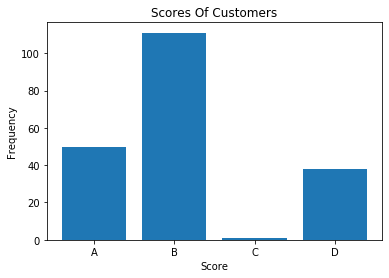

In [20]:
import csv

# 生成模拟数据
costs = []
sales = []
scores = []

# 生成200个模拟数据
for i in range(200):
        # 广告投入服从均值为60，标准差为9的正态分布
        cost = np.random.normal(60,9)
        # 销量由广告费作为自变量的线性回归模型产生，误差服从标准正态分布
        sale = (cost * 0.78 ) + 48 + np.random.normal(0,1)
        # 消费者评分服从均值为78，标准差为9的正态分布
        score = np.random.normal(78,9)
        if 85 <= score and score <= 100:
            group = 'A'
        elif score >= 70:
            group = 'B'
        elif score <= 55:
            group = 'C'
        else:
            group = 'D'
        costs.append(cost)
        sales.append(sale)
        scores.append(group)

data = [costs,sales,scores]

fn = 'sales.csv'
with open (fn,"w",newline = "") as fp:    # 创建CSV文件写入对象
    wr = csv.writer(fp)          
    for item in data:
        wr.writerow(item)
# 可视化——消费者评分柱状图
from matplotlib import pyplot
def drawBar(scores):
    xticks = ['A', 'B', 'C', 'D']
    scoreGroup = {}
    # 对每一等级的评价进行频数统计
    for score in scores:
        scoreGroup[score] = scoreGroup.get(score, 0) + 1
    # 创建柱状图，参数1为柱的横坐标，参数2为柱的高度，参数align为柱的对齐方式
    pyplot.bar(range(4), [scoreGroup.get(xtick, 0) for xtick in xticks], align='center')
    pyplot.xticks(range(4), xticks)
    # 设置横纵坐标轴文字说明
    pyplot.xlabel('Score')
    pyplot.ylabel('Frequency')
    # 设置图标题
    pyplot.title('Scores Of Customers')
    # 绘图
    pyplot.show()
drawBar(scores)

## 饼图

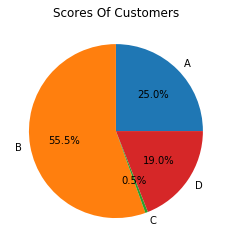

In [28]:
# 绘制饼图
def drawPie(scores):
    labels = ['A', 'B', 'C', 'D']
    scoreGroup = {}
    for score in scores:
        scoreGroup[score] = scoreGroup.get(score, 0) + 1
    # 参数1为扇形面积，label为扇形说明文字，参数3为扇形占比的显示格式
    pyplot.pie([scoreGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    pyplot.title('Scores Of Customers')
    pyplot.show()
drawPie(scores)

## 直方图

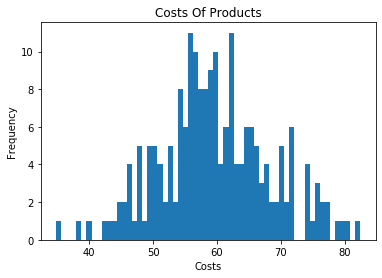

In [29]:
# 可视化——直方图
def drawHist(costs):
    pyplot.hist(costs, 60)
    pyplot.xlabel('Costs')
    pyplot.ylabel('Frequency')
    pyplot.title('Costs Of Products')
    pyplot.show()
drawHist(costs)

## 散点图

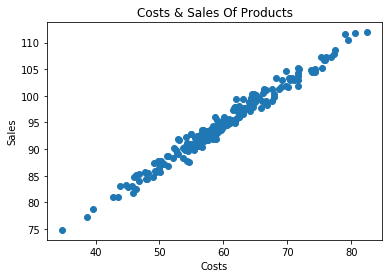

In [30]:
# 关系分析——散点图
def drawScatter(costs, sales):
    pyplot.scatter(costs, sales)
    pyplot.xlabel('Costs')
    pyplot.ylabel('Sales')
    pyplot.title('Costs & Sales Of Products')
    pyplot.show()
drawScatter(costs, sales)

## 箱型图

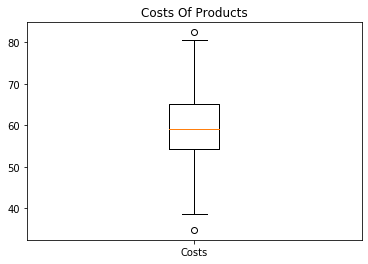

In [31]:
# 箱型图：
def drawBox(costs):
    pyplot.boxplot([costs], labels=['Costs'])
    pyplot.title('Costs Of Products')
    pyplot.show()
drawBox(costs)